In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raiha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1. Data Cleaning

In [3]:
df = pd.read_csv("youtubemusic.csv")
df.head()

reviewId         userName  \
0  baf9417d-5181-419f-8143-5ded69a893e4  Pengguna Google   
1  4a2cfbe1-285e-46d2-927f-7aa59106f2cc  Pengguna Google   
2  fdb5ace7-9d18-4232-ac54-138d675ff093  Pengguna Google   
3  40796e7a-46da-4e58-a5ca-4911d0684459  Pengguna Google   
4  cdb950c9-20c2-4af5-a86f-abcb27d5b2b6  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  Enaknya pake yt music sepaket sama YouTube pre...      4             30   
1  Overall emang bagus dibandingkan dengan Spotif...      1            202   
2  Hai Google, saya cukup kecewa dengan kualitas ...      2             54   
3  Baru instal lagi setelah sekian lama, aplikasi...      5            675   
4  Saya pengguna premium. Pertama pake selalu sal...      1           1781   

  reviewCreatedVersion                   at  replyContent  repliedAt  \
0              7.07.51  2024-07-05 22:31:29           NaN        NaN   
1              7.07.51  2024-07-05 04:03:05           NaN        NaN   
2              7.07.51  2024-06-28 13:58:06           NaN        NaN   
3              7.06.53  2024-06-22 07:32:51           NaN        NaN   
4              6.51.52  2024-05-10 21:39:41           NaN        NaN   

  appVersion  
0    7.07.51  
1    7.07.51  
2    7.07.51  
3    7.06.53  
4    6.51.52

In [4]:
df = df[['content', 'score']]
df.head()

content  score
0  Enaknya pake yt music sepaket sama YouTube pre...      4
1  Overall emang bagus dibandingkan dengan Spotif...      1
2  Hai Google, saya cukup kecewa dengan kualitas ...      2
3  Baru instal lagi setelah sekian lama, aplikasi...      5
4  Saya pengguna premium. Pertama pake selalu sal...      1

In [5]:
df.shape

(5000, 2)

In [6]:
df = df.dropna()

In [7]:
def clean_mobile_data(text):
    # Menghapus mention
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Menghapus hashtag
    text = re.sub(r'#\w+', '', text)
    # Menghapus retweet "RT"
    text = re.sub(r'RT[\s]+', '', text)
    # Menghapus URL
    text = re.sub(r'https?://\S+', '', text)
    # Menghapus karakter non-alfanumerik kecuali spasi
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    # Menghapus spasi berlebihan
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

df['content'] = df['content'].apply(clean_mobile_data)

In [8]:
df.head()

content  score
0  Enaknya pake yt music sepaket sama YouTube pre...      4
1  Overall emang bagus dibandingkan dengan Spotif...      1
2  Hai Google saya cukup kecewa dengan kualitas s...      2
3  Baru instal lagi setelah sekian lama aplikasi ...      5
4  Saya pengguna premium Pertama pake selalu sala...      1

In [9]:
df['content'] = df['content'].str.lower()

In [10]:
df.head()

content  score
0  enaknya pake yt music sepaket sama youtube pre...      4
1  overall emang bagus dibandingkan dengan spotif...      1
2  hai google saya cukup kecewa dengan kualitas s...      2
3  baru instal lagi setelah sekian lama aplikasi ...      5
4  saya pengguna premium pertama pake selalu sala...      1

### 2. Data preprocessing

In [11]:
score = df['score']

In [12]:
# Mengatur agar Pandas menampilkan semua baris
pd.set_option('display.max_rows', None)

# Mengatur agar Pandas menampilkan seluruh isi kolom
pd.set_option('display.max_colwidth', None)

df_50_100 = df.iloc[0:301]  # iloc[start:stop] menampilkan dari start hingga stop-1
print(df_50_100)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               content  \
0                                                    enaknya pake yt music sepaket sama youtube premium jadinya lebih hemat biaya dan ga perlu langganan layanan music lainnya namun untuk soal algoritma sama fitur menurut saya lebih prefer sama spotify sih disini fiturnya agak minim gak ada fitur crossfadeyang dimana untuk menggabungkan durasi bagian akhir dan bagian awal setelah lagunya hampir selesai tuk sementara saya kasih bintang 4 dlu untuk pengembangdeveloper tolong adain fitur cross

In [13]:
norm = { ' yg ' : ' yang ', ' yt ' : ' youtube ', ' apl ' : ' aplikasi ', ' tolol' : '' , 'baguss ' : 'bagus ', ' nya ' : '', ' gk ': ' ga ', ' bagu ': ' bagus '
        ,' gw ' : ' saya ', ' music ' : ' musik ', ' kalo ' : ' kalau ', ' nya ' : '', ' nya' : '', ' y ' : '', ' belakanh ' : ' belakang ', ' blm ' : ' belum '
        , ' sptfy ' : ' spotify ', ' apk ' : ' aplikasi ', ' sy ' : ' saya ', ' tdk ' : ' tidak ', ' apl ' : ' aplikasi ', ' apdet ' : ' update ', ' apk ': ' aplikasi '
        , ' upgred ' : ' update '}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [14]:
df = df.reset_index(drop=True)

In [15]:
df.head()

content  \
0                                                                enaknya pake youtube musik sepaket sama youtube premium jadinya lebih hemat biaya dan ga perlu langganan layanan musik lainnya namun untuk soal algoritma sama fitur menurut saya lebih prefer sama spotify sih disini fiturnya agak minim gak ada fitur crossfadeyang dimana untuk menggabungkan durasi bagian akhir dan bagian awal setelah lagunya hampir selesai tuk sementara saya kasih bintang 4 dlu untuk pengembangdeveloper tolong adain fitur crossfade   
1                                                                                                              overall emang bagus dibandingkan dengan spotify tapi ada nih satu hal yang aku bencii banget di youtube musik ini kalau kita gak ada premium kita gak bisa mainin musik di background jadi harus tetap di aplikasi kalau nggak musiknya gak bisa main beda sama spotify walaupun gratis bisa tuh mainin musik di background ini youtube musik udah ada iklan gak bisa main musik di background lagi kesel banget dah   
2  hai google saya cukup kecewa dengan kualitas suara dari youtube musik ini saya adalah pengguna premium pertama kali nyoba dan saya senang karena youtube dan youtube musik premiumnya satu jadi tidak beli terpisah tapi saya coba kualitas suara dari youtube musik agak lumayan jauh dengan kualitas suara dari aplikasi spotify semoga google bisa segera meningkatkan kualitasnya agar pengguna yang sudah beli premium tidak kecewa memang ada eq tapi suaranya malah jadi kecil untuk saat ini saya pakai spotify dulu mks   
3                                                                                                                                                                                                                                                                                          baru instal lagi setelah sekian lama aplikasi sudah membaik tapi buatlah supaya mendukung equalizer eksternal seperti poweramp youtube musik sudah baik tapi sepertinya saya masih pakai app hijau untuk pengalaman yang lebih fleksibel   
4                                                              saya pengguna premium pertama pake selalu salah masukin lagu ke playlist tujuan saya pake app ini biar saya bisa buat playlist lagu anime yang durasinya cuma 1 menit karena di spotify ga bisa eh ini pas saya add lagu yang short versionnya ke playlist dia malah auto masukin yang versi officialnya yang tentu saja durasinya panjang tolong diperbaiki dong buat biar kita bisa masukin musik dari video yang mana aja ke playlist ga mesti dari yang official   

   score  
0      4  
1      1  
2      2  
3      5  
4      1

In [16]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover. StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

# Mengatur stopwords
more_stop_words = []  # Daftar stopwords tambahan
stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

# Fungsi untuk menghapus stopwords
def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

# Menerapkan fungsi pada kolom 'content'
df['content'] = df['content'].apply(lambda x: stopword(x))

In [17]:
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                                                                                   [enaknya, pake, youtube, musik, sepaket, sama, youtube, premium, jadinya, lebih, hemat, biaya, ga, perlu, langganan, layanan, musik, lainnya, soal, algoritma, sama, fitur, saya, lebih, prefer, sama, spotify, sih, disini, fiturnya, minim, gak, fitur, crossfadeyang, untuk, menggabungkan, durasi, bagian, akhir, bagian, awal, lagunya, hampir, selesai, tuk, saya, kasih, bintang, 4, dlu, untuk, pengembangdeveloper, adain, fitur, crossfade]
1                                                                                                                                                                                                 [overall, emang, bagus, dibandingkan, spotify, nih, satu, yang, aku, bencii, banget, youtube, musik, kalau, gak, premium, gak, mainin, musik, background, jadi, tetap, aplikasi, kalau, musiknya, gak, main, beda, sama, spotify, walaupun, gratis, tuh, mai

In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

enak pake youtube musik paket sama youtube premium jadi lebih hemat biaya ga perlu langgan layan musik lain soal algoritma sama fitur saya lebih prefer sama spotify sih sini fiturnya minim gak fitur crossfadeyang untuk gabung durasi bagi akhir bagi awal lagu hampir selesai tuk saya kasih bintang 4 dlu untuk pengembangdeveloper adain fitur crossfade
overall emang bagus banding spotify nih satu yang aku benci banget youtube musik kalau gak premium gak mainin musik background jadi tetap aplikasi kalau musik gak main beda sama spotify walaupun gratis tuh mainin musik background youtube musik udah ada iklan gak main musik background kesel banget dah
hai google cukup kecewa kualitas suara youtube musik saya guna premium pertama kali nyoba saya senang youtube youtube musik premium satu jadi beli pisah saya coba kualitas suara youtube musik lumayan jauh kualitas suara aplikasi spotify moga google segera tingkat kualitas guna sudah beli premium kecewa memang eq suara malah jadi kecil saat saya 

In [21]:
df = pd.concat([tokenized, score], axis=1)
df.head()

content  \
0                     enak pake youtube musik paket sama youtube premium jadi lebih hemat biaya ga perlu langgan layan musik lain soal algoritma sama fitur saya lebih prefer sama spotify sih sini fiturnya minim gak fitur crossfadeyang untuk gabung durasi bagi akhir bagi awal lagu hampir selesai tuk saya kasih bintang 4 dlu untuk pengembangdeveloper adain fitur crossfade   
1                                                                      overall emang bagus banding spotify nih satu yang aku benci banget youtube musik kalau gak premium gak mainin musik background jadi tetap aplikasi kalau musik gak main beda sama spotify walaupun gratis tuh mainin musik background youtube musik udah ada iklan gak main musik background kesel banget dah   
2  hai google cukup kecewa kualitas suara youtube musik saya guna premium pertama kali nyoba saya senang youtube youtube musik premium satu jadi beli pisah saya coba kualitas suara youtube musik lumayan jauh kualitas suara aplikasi spotify moga google segera tingkat kualitas guna sudah beli premium kecewa memang eq suara malah jadi kecil saat saya pakai spotify dulu mks   
3                                                                                                                                                                                                                         baru instal telah sekian lama aplikasi baik buat dukung equalizer eksternal poweramp youtube musik baik seperti masih pakai app hijau alam lebih fleksibel   
4                                          guna premium pertama pake selalu salah masukin lagu playlist tuju pake app biar buat playlist lagu anime durasi cuma 1 menit di spotify ga bisa eh pas add lagu short versionnya playlist malah auto masukin versi officialnya tentu durasi panjang baik dong buat biar bisa masukin musik video mana aja playlist ga mesti yang official   

   score  
0      4  
1      1  
2      2  
3      5  
4      1

### 3. Labelling

In [22]:
def label_sentiment(score):
    if score < 3:
        return 'negatif'
    if score == 3:
        return 'netral'
    else:
        return 'positif'
    
df['sentimen'] = df['score'].apply(label_sentiment)

In [23]:
df.head()

content  \
0                     enak pake youtube musik paket sama youtube premium jadi lebih hemat biaya ga perlu langgan layan musik lain soal algoritma sama fitur saya lebih prefer sama spotify sih sini fiturnya minim gak fitur crossfadeyang untuk gabung durasi bagi akhir bagi awal lagu hampir selesai tuk saya kasih bintang 4 dlu untuk pengembangdeveloper adain fitur crossfade   
1                                                                      overall emang bagus banding spotify nih satu yang aku benci banget youtube musik kalau gak premium gak mainin musik background jadi tetap aplikasi kalau musik gak main beda sama spotify walaupun gratis tuh mainin musik background youtube musik udah ada iklan gak main musik background kesel banget dah   
2  hai google cukup kecewa kualitas suara youtube musik saya guna premium pertama kali nyoba saya senang youtube youtube musik premium satu jadi beli pisah saya coba kualitas suara youtube musik lumayan jauh kualitas suara aplikasi spotify moga google segera tingkat kualitas guna sudah beli premium kecewa memang eq suara malah jadi kecil saat saya pakai spotify dulu mks   
3                                                                                                                                                                                                                         baru instal telah sekian lama aplikasi baik buat dukung equalizer eksternal poweramp youtube musik baik seperti masih pakai app hijau alam lebih fleksibel   
4                                          guna premium pertama pake selalu salah masukin lagu playlist tuju pake app biar buat playlist lagu anime durasi cuma 1 menit di spotify ga bisa eh pas add lagu short versionnya playlist malah auto masukin versi officialnya tentu durasi panjang baik dong buat biar bisa masukin musik video mana aja playlist ga mesti yang official   

   score sentimen  
0      4  positif  
1      1  negatif  
2      2  negatif  
3      5  positif  
4      1  negatif

In [24]:
sentiment_counts = df.sentimen.value_counts()
sentiment_counts

sentimen
positif    2544
negatif    1923
netral      533
Name: count, dtype: int64

### 4. Splitting data

In [25]:
X = df.content
y = df.sentimen

In [26]:
x_train = df[['content']]
y_train = df['sentimen']

x_test = df[['content']]
y_test = df['sentimen']

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

### 5. Training data

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


cvec = CountVectorizer()
tvec = TfidfVectorizer()
hvec = HashingVectorizer()

In [29]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [30]:
# Membagi data menjadi fitur dan label
x_train = df['content']
y_train = df['sentimen']

x_test = df['content']
y_test = df['sentimen']

# Menggunakan TfidfVectorizer untuk vektorisasi teks
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Inisialisasi dan pelatihan model SVC
hasilsvm = SVC(kernel='linear')  # Gunakan kernel linear untuk kasus klasifikasi teks
hasilsvm.fit(x_train_vec, y_train)

# Prediksi dengan model
y_pred1 = hasilsvm.predict(x_test_vec)

# Membuat classification report
report = classification_report(y_test, y_pred1)
print(report)

              precision    recall  f1-score   support

     negatif       0.84      0.92      0.88      1923
      netral       0.97      0.20      0.33       533
     positif       0.87      0.95      0.91      2544

    accuracy                           0.86      5000
   macro avg       0.89      0.69      0.70      5000
weighted avg       0.87      0.86      0.83      5000



In [31]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_test_vec, y)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.7604


In [32]:
# Jika Anda ingin membuat classification report untuk prediksi pada data uji, Anda bisa tetap menggunakan kode sebelumnya.
x_train = df['content']
y_train = df['sentimen']

x_test = df['content']
y_test = df['sentimen']


model1 = SVC(kernel="rbf")
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)
model1.fit(x_train_vec, y_train)

hasil1 = model1.predict(x_test_vec)
report_svc = classification_report(y_test, hasil1)
print(report_svc)

              precision    recall  f1-score   support

     negatif       0.91      0.97      0.94      1923
      netral       1.00      0.47      0.64       533
     positif       0.93      0.98      0.95      2544

    accuracy                           0.92      5000
   macro avg       0.95      0.81      0.85      5000
weighted avg       0.93      0.92      0.92      5000



In [34]:
hasilsvm = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 = f1_score(y_test, hasil1, average='weighted')

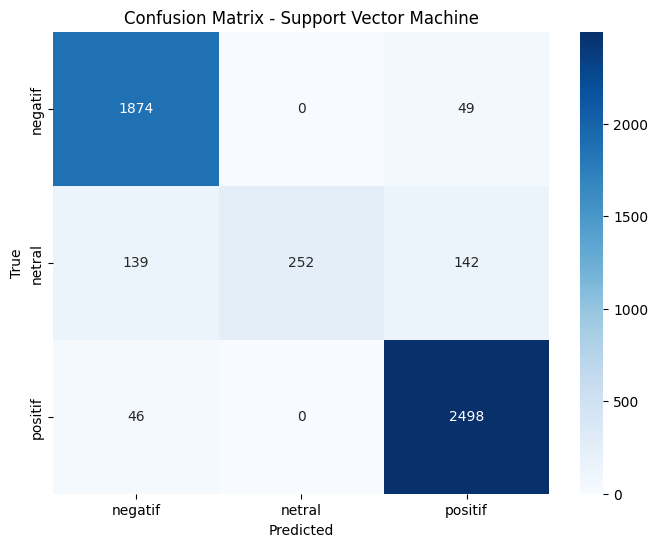

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, hasil1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model1.classes_, yticklabels=model1.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

In [36]:
model = {'Model':['Support Vector Machine'],
         'AccuracyScore':[hasilsvm],
         'Precision':[precision1],
         'Recall': [recall1],
         'f1 score': [f1_1]}

model_df = pd.DataFrame(model)
model_df

Model  AccuracyScore  Precision  Recall  f1 score
0  Support Vector Machine         0.9248   0.929304  0.9248  0.916197

# 7. Visualisasi

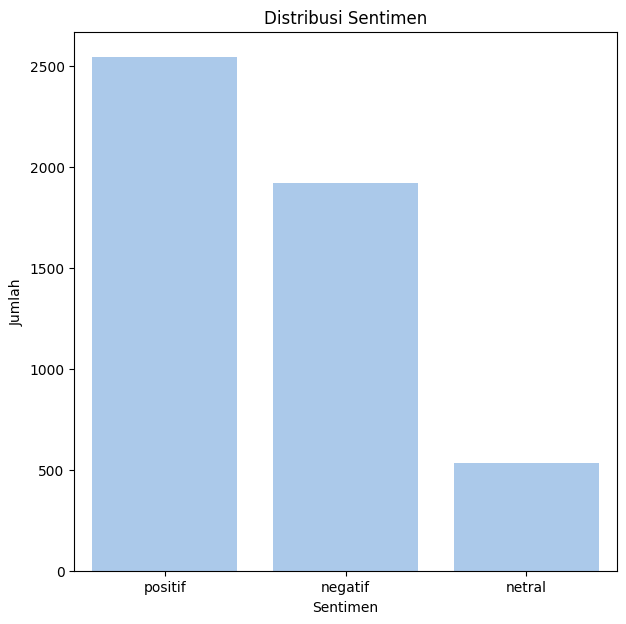

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

sns.set_palette("pastel")
plt.figure(figsize=(7, 7))
sns.countplot(x = 'sentimen', data = df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [38]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']
data_netral = df[df['sentimen'] == 'netral']

## Data yang paling sering muncul

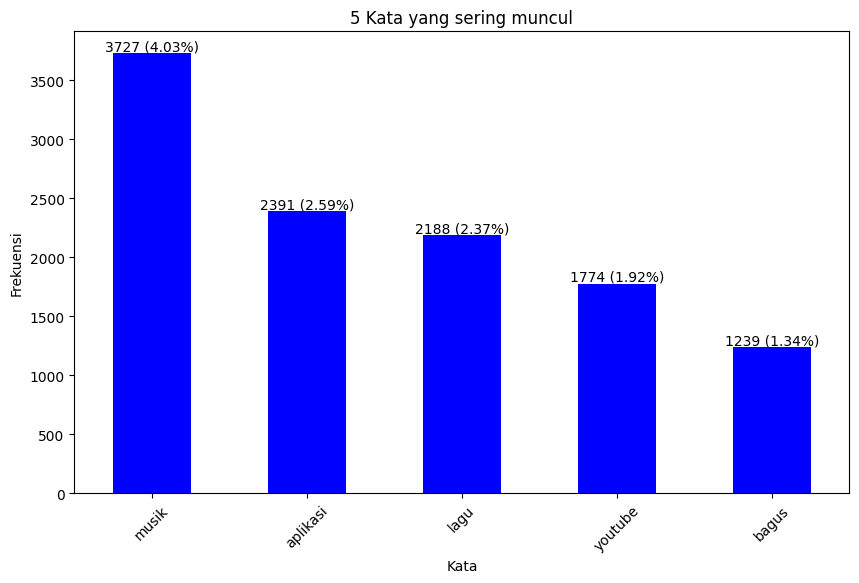

          frequency  percentage
musik          3727    4.031586
aplikasi       2391    2.586403
lagu           2188    2.366813
youtube        1774    1.918979
bagus          1239    1.340256


In [39]:
# Gabungkan semua teks menjadi satu string
all_text_s1 = ' '.join(str(word) for word in df["content"])

# Buat instance CountVectorizer
vectorizer = CountVectorizer()

# Fit dan transform data teks
X = vectorizer.fit_transform([all_text_s1])

# Konversi hasilnya ke DataFrame
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).T
word_counts.columns = ['frequency']
word_counts = word_counts.sort_values(by='frequency', ascending=False)

# Hitung persentase kemunculan kata
total_frequency = word_counts['frequency'].sum()
word_counts['percentage'] = (word_counts['frequency'] / total_frequency) * 100

# Dapatkan 5 kata yang paling sering muncul
top_5_words = word_counts.head(5)

# Plotting bar chart frekuensi
plt.figure(figsize=(10, 6))
top_5_words['frequency'].plot(kind='bar', color='blue')
plt.title("5 Kata yang sering muncul")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
for i, v in enumerate(top_5_words['frequency']):
    plt.text(i, v, f"{v} ({top_5_words['percentage'].iloc[i]:.2f}%)", ha='center', va='bottom')
plt.show()

print(top_5_words)

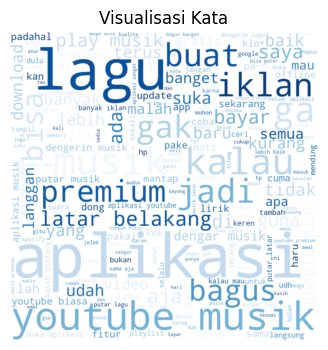

In [40]:
# Assuming data_positif["content"] is a list of text reviews
all_text_s1 = ' '.join(str(word) for word in df["content"])

# Create and generate a word cloud image
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

# Display the generated word cloud image
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata")
plt.show()

## A.Visualisasi data positif

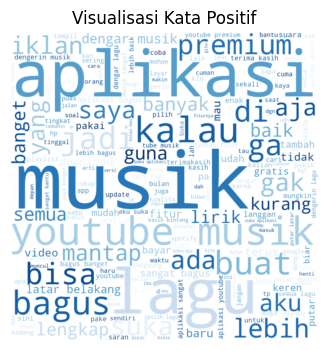

In [41]:
# Assuming data_positif["content"] is a list of text reviews
all_text_s1 = ' '.join(str(word) for word in data_positif["content"])

# Create and generate a word cloud image
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

# Display the generated word cloud image
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.show()

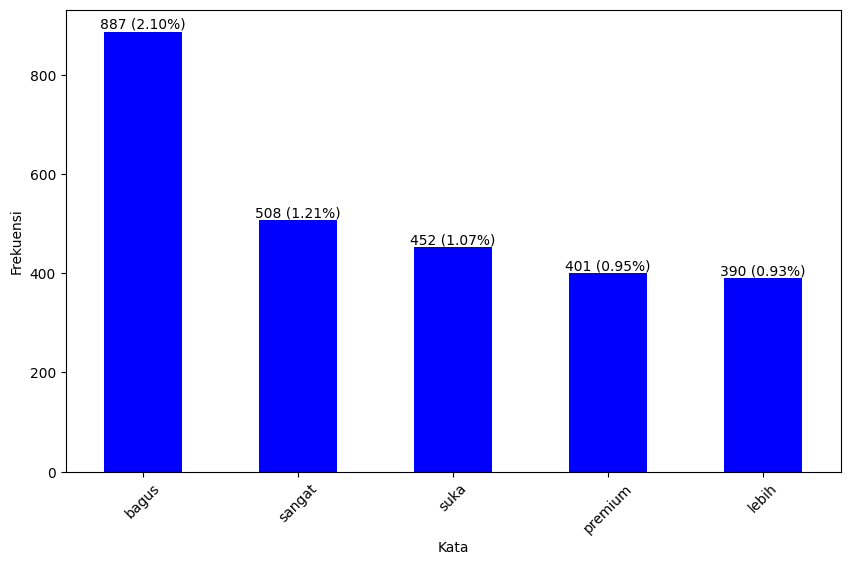

         frequency  percentage
bagus          887    2.104539
sangat         508    1.205305
suka           452    1.072437
premium        401    0.951432
lebih          390    0.925333


In [47]:
# Gabungkan semua teks menjadi satu string
all_text_s1 = ' '.join(str(word) for word in data_positif["content"])

# Buat instance CountVectorizer
vectorizer = CountVectorizer()

# Fit dan transform data teks
X = vectorizer.fit_transform([all_text_s1])

# Konversi hasilnya ke DataFrame
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).T
word_counts.columns = ['frequency']
word_counts = word_counts.sort_values(by='frequency', ascending=False)

# Hitung persentase kemunculan kata
total_frequency = word_counts['frequency'].sum()
word_counts['percentage'] = (word_counts['frequency'] / total_frequency) * 100

# Hapus kata-kata yang tidak diinginkan
kata_tidak_diinginkan = ['musik', 'aplikasi', 'youtube', 'lagu', 'kalau']
word_counts = word_counts[~word_counts.index.isin(kata_tidak_diinginkan)]

# Dapatkan 5 kata yang paling sering muncul (setelah menghapus kata-kata yang tidak diinginkan)
top_5_words = word_counts.head(5)

# Plotting bar chart frekuensi
plt.figure(figsize=(10, 6))
top_5_words['frequency'].plot(kind='bar', color='blue')
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
for i, v in enumerate(top_5_words['frequency']):
    plt.text(i, v, f"{v} ({top_5_words['percentage'].iloc[i]:.2f}%)", ha='center', va='bottom')
plt.show()

print(top_5_words)

## B. Visualisasi data netral

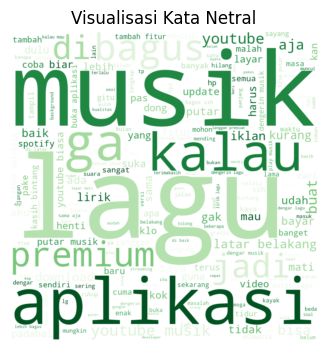

In [43]:
# Assuming data_positif["content"] is a list of text reviews
all_text_s1 = ' '.join(str(word) for word in data_netral["content"])

# Create and generate a word cloud image
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

# Display the generated word cloud image
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Netral")
plt.show()

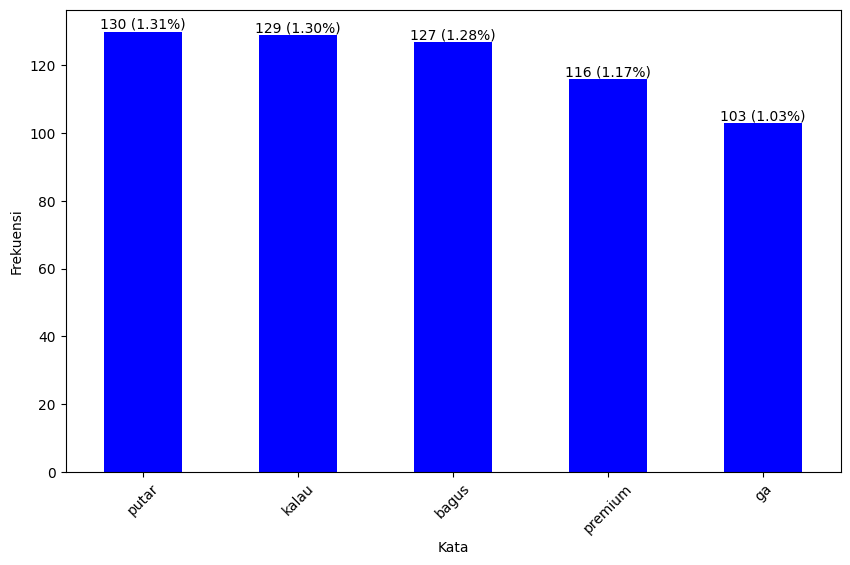

         frequency  percentage
putar          130    1.305614
kalau          129    1.295571
bagus          127    1.275485
premium        116    1.165010
ga             103    1.034448


In [44]:

# Gabungkan semua teks menjadi satu string
all_text_s1 = ' '.join(str(word) for word in data_netral["content"])

# Buat instance CountVectorizer
vectorizer = CountVectorizer()

# Fit dan transform data teks
X = vectorizer.fit_transform([all_text_s1])

# Konversi hasilnya ke DataFrame
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).T
word_counts.columns = ['frequency']
word_counts = word_counts.sort_values(by='frequency', ascending=False)

# Hitung persentase kemunculan kata
total_frequency = word_counts['frequency'].sum()
word_counts['percentage'] = (word_counts['frequency'] / total_frequency) * 100

# Hapus kata-kata yang tidak diinginkan
kata_tidak_diinginkan = ['musik', 'aplikasi', 'youtube', 'lagu', 'di']
word_counts = word_counts[~word_counts.index.isin(kata_tidak_diinginkan)]

# Dapatkan 5 kata yang paling sering muncul (setelah menghapus kata-kata yang tidak diinginkan)
top_5_words = word_counts.head(5)

# Plotting bar chart frekuensi
plt.figure(figsize=(10, 6))
top_5_words['frequency'].plot(kind='bar', color='blue')
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
for i, v in enumerate(top_5_words['frequency']):
    plt.text(i, v, f"{v} ({top_5_words['percentage'].iloc[i]:.2f}%)", ha='center', va='bottom')
plt.show()

print(top_5_words)

## C. Visualisasi data negatif

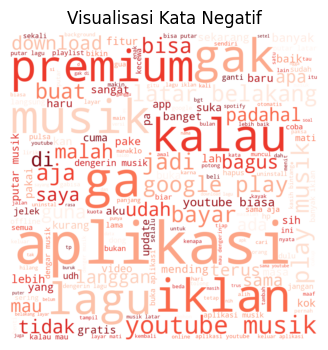

In [45]:
# Assuming data_positif["content"] is a list of text reviews
all_text_s1 = ' '.join(str(word) for word in data_negatif["content"])

# Create and generate a word cloud image
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

# Display the generated word cloud image
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Negatif")
plt.show()

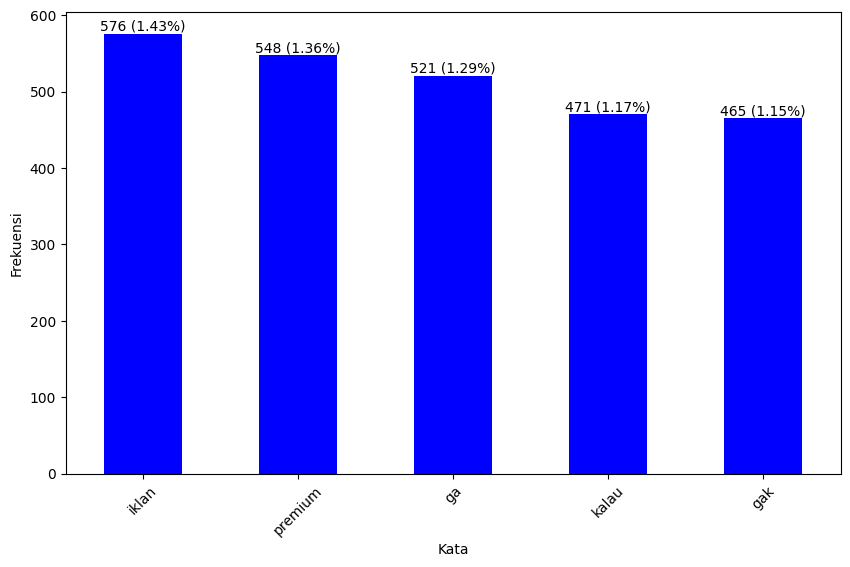

         frequency  percentage
iklan          576    1.427828
premium        548    1.358419
ga             521    1.291490
kalau          471    1.167547
gak            465    1.152673


In [46]:
# Gabungkan semua teks menjadi satu string
all_text_s1 = ' '.join(str(word) for word in data_negatif["content"])

# Buat instance CountVectorizer
vectorizer = CountVectorizer()

# Fit dan transform data teks
X = vectorizer.fit_transform([all_text_s1])

# Konversi hasilnya ke DataFrame
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).T
word_counts.columns = ['frequency']
word_counts = word_counts.sort_values(by='frequency', ascending=False)

# Hitung persentase kemunculan kata
total_frequency = word_counts['frequency'].sum()
word_counts['percentage'] = (word_counts['frequency'] / total_frequency) * 100

# Hapus kata-kata yang tidak diinginkan
kata_tidak_diinginkan = ['musik', 'aplikasi', 'youtube', 'lagu']
word_counts = word_counts[~word_counts.index.isin(kata_tidak_diinginkan)]

# Dapatkan 5 kata yang paling sering muncul (setelah menghapus kata-kata yang tidak diinginkan)
top_5_words = word_counts.head(5)

# Plotting bar chart frekuensi
plt.figure(figsize=(10, 6))
top_5_words['frequency'].plot(kind='bar', color='blue')
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
for i, v in enumerate(top_5_words['frequency']):
    plt.text(i, v, f"{v} ({top_5_words['percentage'].iloc[i]:.2f}%)", ha='center', va='bottom')
plt.show()

print(top_5_words)